## Kaggle score: 

- with fe data v0: MAE=18243
- with fe data v1: MAE=18243 (no change)
- with fe data v2: MAE=14890

# Libraries

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,auc,roc_curve,confusion_matrix
from xgboost import XGBRegressor

In [19]:
train = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/train_fe_v2_2.csv')
test = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/test_fe_v2_2.csv')

# Fit model

# Define predictors and target

In [20]:
# Converto to numpy
x_columns = train.columns.drop(['SalePrice','Unnamed: 0' ])
x = train[x_columns].values
y = train['SalePrice'].values
x_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'GarageFinish4', 'TotRmsAbvGrd2', 'TotRmsAbvGrd3', 'TotRmsAbvGrd4',
       'FireplaceQu2', 'FireplaceQu3', 'FireplaceQu4', 'YearBuilt2',
       'YearBuilt3', 'YearBuilt4'],
      dtype='object', length=114)

## Split data

In [21]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.3, random_state=5)

# Model

In [40]:


model = XGBRegressor(objective='reg:squarederror',n_estimators=1000, learning_rate=0.05, n_jobs=4);

model.fit(x_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(x_train, y_train)], 
             verbose=False);

In [41]:
y_pred = model.predict(x_test)
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [42]:
print(f'R2 = {round(R2,3)} and MAE = {round(MAE,3)}')

R2 = 0.917 and MAE = 14693.738


# Making predictions

In [12]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,GarageFinish4,TotRmsAbvGrd2,TotRmsAbvGrd3,TotRmsAbvGrd4,FireplaceQu2,FireplaceQu3,FireplaceQu4,YearBuilt2,YearBuilt3,YearBuilt4
0,0,1461,0.785714,0.50,0.255591,0.054322,1.0,1.0,0.000000,0.333333,...,0.012346,0.173611,0.072338,0.030141,0.04,0.008,0.0016,0.353077,0.209799,0.124663
1,1,1462,0.785714,0.75,0.258786,0.066685,1.0,1.0,0.333333,0.333333,...,0.012346,0.250000,0.125000,0.062500,0.04,0.008,0.0016,0.327715,0.187605,0.107397
2,2,1463,1.000000,0.75,0.236422,0.064643,1.0,1.0,0.333333,0.333333,...,1.000000,0.250000,0.125000,0.062500,0.36,0.216,0.1296,0.731149,0.625185,0.534579
3,3,1464,1.000000,0.75,0.249201,0.046638,1.0,1.0,0.333333,0.333333,...,1.000000,0.340278,0.198495,0.115789,0.64,0.512,0.4096,0.743594,0.641215,0.552932
4,4,1465,0.928571,0.75,0.137380,0.023394,1.0,1.0,0.333333,1.000000,...,0.197531,0.173611,0.072338,0.030141,0.04,0.008,0.0016,0.670500,0.549033,0.449570


In [13]:
x_ids = test['Id']
test_columns = test.columns.drop(['Unnamed: 0','Id'])
x_test_2 = test[test_columns].values

x_ids


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [14]:
y_pred_2 = model.predict(x_test_2)

final=pd.DataFrame(data={'Id':x_ids,'SalePrice':y_pred_2})
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [15]:
final.head()

,Id,SalePrice
0,1461,125090.976562
1,1462,158421.015625
2,1463,186435.921875
3,1464,193249.734375
4,1465,191821.250000


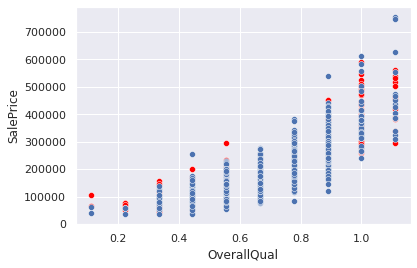

In [16]:
sns.scatterplot(x=test['OverallQual'],y=final['SalePrice'],color="red");
sns.scatterplot(x=train['OverallQual'],y=train['SalePrice']);
plt.savefig('good_results.png')

# Submiting 

In [17]:
# Run the code to save predictions in the format used for competition scoring

final.to_csv('../submissions/submission_xgboost_v1_2_2.csv',index=False)